In [1]:
import numpy as np, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
ntype = 'base_roll50'

In [5]:
pc = prjlib.analysis_init(t='la',freq='coadd',ntype=ntype)
l, tt, ee, bb = np.loadtxt(pc.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))
l, tn, en, bn = np.loadtxt(pc.fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))
#pid = prjlib.analysis_init(t='id',freq='lacoadd',ntype=ntype)
#l, Ti, Ei, Bi = np.loadtxt(pid.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


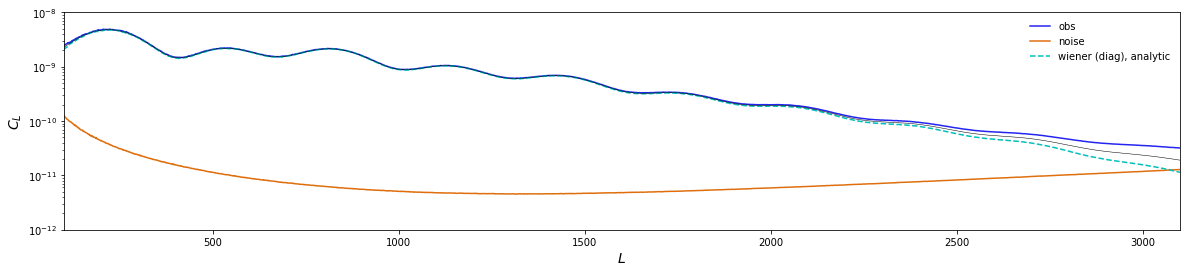

In [8]:
pl.plot_1dstyle(fsize=[20,4],xmin=100,xmax=3100,ymin=1e-12,ymax=1e-8,ylog=True)
#plot(l,l**2*Ti,label='isotropic',lw=2)
plot(l,l**2*tt,label='obs')
plot(l,l**2*tn,label='noise')
plot(l,l**2*pc.lcl[0,:]**2/tt,label='wiener (diag), analytic',ls='--',color='c')
plot(l,l**2*pc.lcl[0,:],color='k',lw=.5)
legend()

In [ ]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=4e-11,ylog=True)
plot(l,l**2*Ei,label='isotropic',lw=2)
plot(l,l**2*ee,label='obs')
plot(l,l**2*en,label='noise')
plot(l,l**2*EW,label='wiener (diag)')
plot(l,l**2*pc.lcl[1,:]**2/ee,label='wiener (diag), analytic',ls='--',color='c')
plot(l,l**2*pc.lcl[1,:],color='k',lw=.5)
legend()

In [ ]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-18,ymax=4e-11,ylog=True)
plot(l,l**2*Bi,label='isotropic',lw=2)
plot(l,l**2*bb,label='obs')
plot(l,l**2*bn,label='noise')
plot(l,l**2*BW,label='wiener (diag)')
plot(l,l**2*pc.lcl[2,:]**2/bb,label='wiener (diag), analytic',ls='--',color='c')
plot(l,l**2*pc.lcl[2,:],color='k',lw=.5)
legend()

In [ ]:
pw = prjlib.analysis_init(t='la',freq='coadd',ntype=ntype,fltr='cinv')
l, TT, EE, BB = np.loadtxt(pw.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))
l, tx, ex, bx = np.loadtxt(pw.fcmb.scl['x'],unpack=True,usecols=(0,1,2,3))

In [ ]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-13,ymax=1e-8,ylog=True)
plot(l,l**2*TT,label='wiener')
plot(l,l**2*tt,label='obs')
plot(l,l**2*tn,label='noise')
plot(l,l**2*tx,label='cross')
plot(l,l**2*TW,label='wiener (diag)')
plot(l,l**2*pc.lcl[0,:]**2/tt,label='wiener (diag), analytic',ls='--',color='c')
plot(l,l**2*pc.lcl[0,:],color='k',lw=.5)
legend()

In [ ]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=4e-11,ylog=True)
plot(l,l**2*EE,label='wiener')
plot(l,l**2*ee,label='obs')
plot(l,l**2*en,label='noise')
plot(l,l**2*ex,label='cross')
plot(l,l**2*EW,label='wiener (diag)')
plot(l,l**2*pc.lcl[1,:]**2/ee,label='wiener (diag), analytic',ls='--',color='c')
plot(l,l**2*pc.lcl[1,:],color='k',lw=.5)
legend()

In [ ]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-18,ymax=4e-11,ylog=True)
plot(l,l**2*BB,label='wiener')
plot(l,l**2*bb,label='obs')
plot(l,l**2*bn,label='noise')
plot(l,l**2*bx,label='cross')
plot(l,l**2*BW,label='wiener (diag)')
plot(l,l**2*pc.lcl[2,:]**2/bb,label='wiener (diag), analytic',ls='--',color='c')
plot(l,l**2*pc.lcl[2,:],color='k',lw=.5)
legend()

In [ ]:
ocl, ifl = prjlib.quad_filter(pw.fcmb.scl,pc.fcmb.scl,pw.lmax,pw.lcl,lTmin=pw.lTmin,lTmax=pw.lTmax)
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-13,ymax=1e-8,ylog=True)
plot(l,l**2*ocl[0,:])
plot(l,l**2*ifl[0,:])